# Instructions:

### Challenge: Measure the accuracy of the sentiment analysis from NLTK and TextBlob from 4.3-Tutorial by comparing the sentiment analysis to the actual sentiment of the tweet.

The dataset used in this analysis was derived from the dataset found at https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment. The original dataset has sentiment scores for each tweet. Use this dataset as the ground truth to measure the accuracy of the TextBlob and NTLK sentiment analysis.


## Import Libray

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt

from nltk.tokenize import TweetTokenizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load the Dataset

In [4]:
# read in the data 
df = pd.read_csv('data/Tweets_PA04.csv') 
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Preprocess data

In [5]:
tokenizer = TweetTokenizer()

def clear_text(text):
    # tokenize the text
    # nltk.download('punkt') # uncomment if you need to download the punkt package
    tokens = tokenizer.tokenize(text)
    
    # remove all tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # make lowercase
    tokens = [word.lower() for word in tokens]

    # remove all tokens that are only one character
    tokens = [word for word in tokens if len(word) > 1]

    return ' '.join(tokens)

df['clean_text']=df.text.apply(lambda x: clear_text(x))   
df['hashtags'] = df.text.apply(lambda text: re.findall(r"#(\w+)", text))
df['handles'] = df.text.apply(lambda text: re.findall(r"@(\w+)", text))

In [6]:
df.head(50)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,hashtags,handles
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),what said,[],"[VirginAmerica, dhepburn]"
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercials to the experience tacky,[],[VirginAmerica]
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need to take another trip,[],[VirginAmerica]
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive to blast obnoxious entertain...,[],[VirginAmerica]
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and really big bad thing about it,[],[VirginAmerica]
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),seriously would pay flight for seats that have...,[],[VirginAmerica]
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),yes nearly every time fly vx this ear worm won...,[],[VirginAmerica]
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada),really missed prime opportunity for men withou...,[],[VirginAmerica]
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),well but now do,[],[virginamerica]
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),it was amazing and arrived an hour early too g...,[],[VirginAmerica]


In [7]:
df = df.drop(columns=["tweet_id", "name", "retweet_count"]) # though we could use these columns for other analysis, for this analysis we will not

In [8]:
df["airline"].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

### Sentiment analysis using TextBlob

In [9]:
analyzer = SentimentIntensityAnalyzer()

df['tb_polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).polarity)
df['tb_sentiment'] = df['tb_polarity'].apply(lambda x: 'pos' if x >=0 else 'neg')

df.sample(n=20)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,hashtags,handles,tb_polarity,tb_sentiment
12248,negative,1.0000,Lost Luggage,0.6635,American,NaN,NaN,@AmericanAir #AmericanAirlines says most bags ...,NaN,2015-02-24 08:02:29 -0800,"ÜT: 26.72488,-80.13666",Eastern Time (US & Canada),says most bags left in miami have been returne...,[AmericanAirlines],[AmericanAir],0.166667,pos
611,positive,0.6350,NaN,0.0000,United,NaN,NaN,"@united Wow. What a deal. Again, 30+ plus seat...",NaN,2015-02-24 07:58:40 -0800,"Richmond, VA",Eastern Time (US & Canada),wow what deal again plus seats available easy ...,[],[united],0.433333,pos
4461,positive,1.0000,NaN,NaN,Southwest,NaN,NaN,@SouthwestAir is the best airline hands down. ...,NaN,2015-02-24 07:07:26 -0800,NaN,Central Time (US & Canada),is the best airline hands down amazing custome...,[happycamper],[SouthwestAir],0.461111,pos
10217,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,NaN,@USAirways and at this point I don't need sorr...,NaN,2015-02-22 05:12:35 -0800,NaN,NaN,and at this point need sorry need revers agt t...,[],[USAirways],-0.500000,neg
3947,negative,1.0000,Customer Service Issue,0.6947,United,NaN,NaN,"@united, wtf is your username and/or email add...",NaN,2015-02-17 22:04:03 -0800,Brisbane,Brisbane,wtf is your username and or email addr signin ...,[],[united],-0.500000,neg
5400,negative,1.0000,Cancelled Flight,1.0000,Southwest,NaN,NaN,@SouthwestAir thanks for the Cancelled Flighta...,NaN,2015-02-21 06:37:45 -0800,"Columbus, Ohio",NaN,thanks for the cancelled flightation today onl...,[],[SouthwestAir],0.100000,pos
2449,negative,0.6710,Late Flight,0.6710,United,NaN,NaN,"@united although, I am stranded in Chicago O'H...",NaN,2015-02-21 10:18:36 -0800,NaN,Eastern Time (US & Canada),although am stranded in chicago for another ho...,[],[united],0.000000,pos
10775,neutral,1.0000,NaN,NaN,US Airways,NaN,NaN,@USAirways I'm not a frequent flyer with US ai...,NaN,2015-02-20 13:32:38 -0800,"Adelaide, South Australia",Adelaide,not frequent flyer with us airways qantas can ...,[],[USAirways],-0.050000,neg
13664,negative,1.0000,Can't Tell,1.0000,American,NaN,NaN,@AmericanAir has to be the worst airline in th...,NaN,2015-02-22 23:42:43 -0800,"Scottsdale, AZ",NaN,has to be the worst airline in the world,"[yousuck, horrible, Oscars2015]",[AmericanAir],-1.000000,neg
8274,neutral,0.6602,NaN,0.0000,Delta,NaN,NaN,@JetBlue and of course that was supposed to sa...,NaN,2015-02-19 14:38:16 -0800,NOVA,America/New_York,and of course that was supposed to say logan n...,[],[JetBlue],0.000000,pos


In [40]:
df.loc[df.tb_polarity >= 0.85 , ["tb_polarity", "airline", "text"]].sample(20).values

array([[1.0, 'Southwest',
        '@SouthwestAir Any way you can help with entry to Vegas event? My Boyfriend &amp; I have been @Imaginedragons fans since 2009. They are awesome!'],
       [1.0, 'US Airways',
        '@USAirways YOU ARE THE BEST AIRWAYS!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏'],
       [1.0, 'US Airways',
        '@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏'],
       [1.0, 'American',
        '@AmericanAir Thank you for being so responsive on Twitter. Truly impressive.'],
       [1.0, 'American',
        "@AmericanAir What's the best way to check on any delays or Cancelled Flightlations for my flight out of DFW on Tuesday?"],
       [1.0, 'Delta',
        '@JetBlue is the greatest airline ever 💕✈️💺 #TrueBluePoints #jetbluemember'],
       [1.0, 'US Airways',
        '@USAirways @AmericanAir @SVLLINDIA provides you the best logistics experience for people all over India.\n#Mumbai #Surat #NaviMumbai'],
       [1.0, 'American', "@AmericanAir what's the best nu

In [41]:
df.loc[df.tb_polarity >= -0.85 , ["tb_polarity", "airline", "text"]].sample(20).values

array([[0.0, 'United',
        "@united you'd learn if you listen to your customers...you do want you want...@VirginAmerica asks their customer what they want"],
       [0.0, 'United',
        '@united i left an item on the plane and have been calling non stop and no one has been answering can you please help'],
       [2.7755575615628914e-17, 'United',
        '@united I have a question about my interview process I had only one interview but was the last person is that good or bad'],
       [0.0, 'Southwest',
        '@SouthwestAir @Imaginedragons @beatsmusic well timed tweet, just boarded and will be listening on my way home!'],
       [0.0, 'Southwest',
        '@SouthwestAir I have followed you. Awaiting your DM.'],
       [0.0, 'United',
        '@united we are never going to get to out gate at this rate.'],
       [0.05, 'United',
        "“@united: @leigh_emery We don't like to hear this. Is there anything we can help with? Thanks. ^EY” another empty offer for help."],
       [0

### Sentiment analysis using NLTK

In [10]:
analyzer = SentimentIntensityAnalyzer()

df['nltk_polarity'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['nltk_sentiment'] = df['nltk_polarity'].apply(lambda x: 'pos' if x >=0 else 'neg')

df.sample(n=20)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,hashtags,handles,tb_polarity,tb_sentiment,nltk_polarity,nltk_sentiment
7098,positive,1.0000,NaN,NaN,Delta,NaN,NaN,Lovely! RT @JetBlue: Our fleet’s on fleek. htt...,NaN,2015-02-23 11:11:56 -0800,Worldwide,Caracas,lovely rt our fleet on fleek,[],[JetBlue],0.500000,pos,0.5859,pos
11869,negative,1.0000,Cancelled Flight,0.6774,US Airways,NaN,NaN,. @USAirways It's been Cancelled Flighted. You...,NaN,2015-02-17 08:27:14 -0800,Downers Grove,Central Time (US & Canada),been cancelled flighted your sm response is slow,[],[USAirways],-0.300000,neg,-0.2500,neg
3425,negative,1.0000,Customer Service Issue,1.0000,United,NaN,NaN,@united need to chat with an actual human ASAP!,NaN,2015-02-19 08:42:49 -0800,NaN,Central Time (US & Canada),need to chat with an actual human asap,[],[united],0.000000,pos,0.0000,pos
9460,negative,1.0000,Lost Luggage,1.0000,US Airways,NaN,NaN,"@USAirways Very frustrated, checked bag in Log...",NaN,2015-02-23 10:24:12 -0800,NaN,NaN,very frustrated checked bag in logan was not g...,[],"[USAirways, USAirways]",-0.910000,neg,-0.8016,neg
10227,negative,1.0000,Late Flight,1.0000,US Airways,NaN,NaN,@USAirways @AmericanAir working for me. Tight ...,NaN,2015-02-22 04:55:28 -0800,Old City Philly,NaN,working for me tight cx so delaying our flight...,[],"[USAirways, AmericanAir, Mia, jabevan221]",-0.178571,neg,0.0000,pos
8988,neutral,1.0000,NaN,NaN,US Airways,NaN,NaN,@USAirways I need help about a ticket. DM me,NaN,2015-02-24 11:00:19 -0800,✈️ Birmingham ✈️ Brooklyn ✈️,Central Time (US & Canada),need help about ticket dm me,[],[USAirways],0.000000,pos,0.4019,pos
9327,positive,0.6814,NaN,NaN,US Airways,NaN,NaN,@USAirways ok thanks,NaN,2015-02-23 14:16:32 -0800,NaN,Eastern Time (US & Canada),ok thanks,[],[USAirways],0.350000,pos,0.6249,pos
12951,negative,0.6488,Flight Booking Problems,0.3346,American,NaN,NaN,@AmericanAir I paid using Paypal online and af...,NaN,2015-02-23 13:37:46 -0800,"Michigan, US",Quito,paid using paypal online and after was charged...,[],[AmericanAir],0.000000,pos,-0.5423,neg
1186,negative,1.0000,Late Flight,1.0000,United,NaN,NaN,"@united and most frustratingly, all this delay...",NaN,2015-02-23 08:50:15 -0800,NaN,Atlantic Time (Canada),and most frustratingly all this delay happened...,[],[united],0.050000,pos,-0.7778,neg
7844,negative,1.0000,Customer Service Issue,0.6552,Delta,NaN,NaN,@JetBlue that I missed my flight. I had to boo...,NaN,2015-02-21 09:44:28 -0800,CONCRETE JUNGLE,Pacific Time (US & Canada),that missed my flight had to book this flight ...,[],[JetBlue],-0.033333,neg,-0.7906,neg


In [43]:
df.loc[df.nltk_polarity > .85 , ["nltk_polarity", "airline", "text"]].sample(20).values

array([[0.8658, 'Southwest',
        '@SouthwestAir i live in the southwest, Imagine Dragons is my favorite band, and i met my 2bestfriends thanks to them. it would be amazing +'],
       [0.9169, 'Delta',
        '@JetBlue I just wanted to say flight attendant fitz was the best tonight on flight #1326 bwi/Bos. Great guy and made the flight fantastic!'],
       [0.9047, 'Southwest',
        '@SouthwestAir Thank you Thank you Thank you!!! My last attempt to win #DestinationDragons tickets was a success! I could not be happier!! :)'],
       [0.872, 'United',
        "@united we've been waiting 45 min for a gate at SFO... Yet so many of them are free.  Your excellence in operational efficiency is showing"],
       [0.9371, 'Delta',
        ".@JetBlue thx for confirming! Again, yr team is awesome. Thanks for the prompt &amp; helpful response! Cheers to less snow in everyone's future"],
       [0.8885, 'Delta',
        "@JetBlue ok!!! That's super helpful. Thank you. I'll reach out if I ha

In [44]:
df.loc[df.nltk_polarity < -0.85 , ["nltk_polarity", "airline", "text"]].sample(20).values

array([[-0.8718, 'United',
        "@united I'm very frustrated and have wasted 2 days now due to your equipment failures."],
       [-0.8807, 'American',
        '@AmericanAir WORST SERVICE EVER!! Delayed flights for more than 5 hours plus you missed my bag! And your employees are rude 😡😡'],
       [-0.8516, 'United',
        '@united here we go again. 2 of 3 segments SFO--New York RT were delayed OVER 2 hrs each! Why do you suck so BAD!?!Maybe another line of bus?'],
       [-0.9339, 'US Airways',
        '@USAirways @AmericanAir have the most rude, unreliable, horrible company with equally rude, unreliable and horrible employees. Stay tuned.'],
       [-0.8648, 'American',
        "@AmericanAir Hey so I'm very disappointed with my time traveling with you! I've had the worst experience and both times the flight delayed!"],
       [-0.8689, 'American',
        '@AmericanAir we are through. I can quit you. I am. The nonsense &amp; lies are a colossal infringement you can no longer get 

## Encode Ground Truth Sentiments:

In [45]:
# Define a mapping dictionary for sentiment labels
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}

# Map the 'airline_sentiment' column to numeric labels and create a new column
df['ground_truth_sentiment'] = df['airline_sentiment'].map(sentiment_mapping)


In [46]:
df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,hashtags,handles,tb_polarity,tb_sentiment,nltk_polarity,nltk_sentiment,ground_truth_sentiment
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,NaN,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),what said,[],"[VirginAmerica, dhepburn]",0.000000,pos,0.0000,pos,0
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,NaN,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercials to the experience tacky,[],[VirginAmerica],0.000000,pos,0.0000,pos,1
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,NaN,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need to take another trip,[],[VirginAmerica],-0.312500,neg,0.0000,pos,0
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,NaN,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive to blast obnoxious entertain...,[],[VirginAmerica],0.006250,pos,-0.2716,neg,-1
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,NaN,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and really big bad thing about it,[],[VirginAmerica],-0.350000,neg,-0.5829,neg,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,NaN,NaN,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,thank you we got on different flight to chicago,[],[AmericanAir],0.000000,pos,0.3612,pos,1
14636,negative,1.0000,Customer Service Issue,1.0000,American,NaN,NaN,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,leaving over minutes late flight no warnings o...,[],[AmericanAir],-0.300000,neg,-0.7906,neg,-1
14637,neutral,1.0000,NaN,NaN,American,NaN,NaN,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airlines to,[BlackBerry10],[AmericanAir],0.000000,pos,0.3182,pos,0
14638,negative,1.0000,Customer Service Issue,0.6659,American,NaN,NaN,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),you have my money you change my flight and ans...,[],[AmericanAir],-0.125000,neg,0.3818,pos,-1


## Calculate Accuracy:

In [47]:
textblob_accuracy = (df['tb_polarity'].apply(lambda x: 1 if x >= 0 else -1) == df['ground_truth_sentiment']).mean()
nltk_accuracy = (df['nltk_polarity'].apply(lambda x: 1 if x >= 0 else -1) == df['ground_truth_sentiment']).mean()

print(f"TextBlob Accuracy: {textblob_accuracy:.2%}")
print(f"NLTK Accuracy: {nltk_accuracy:.2%}")


TextBlob Accuracy: 36.31%
NLTK Accuracy: 46.58%


TextBlob Accuracy: 36.31%

This means that TextBlob correctly predicted the sentiment labels for approximately 36.31% of the instances in our dataset. In other words, its predictions matched the ground truth sentiment labels for around 36.31% of the data points.

NLTK Accuracy: 46.58%

NLTK's sentiment analysis model achieved an accuracy of approximately 46.58%, indicating that it made correct predictions for approximately 46.58% of the instances in our dataset.

NLTK's Higher accuracy suggest better performance in predicting sentiment labels, while lower accuracy score using TextBlob suggest that the models may have difficulty with certain aspects of our data or may require further fine-tuning for better results.

In [48]:
airlines_of_interest = ["United", "Southwest", "American"]
#data = df[df.tb_polarity != 0]
data = df[(df.tb_polarity < -0.1) | (df.tb_polarity > 0.1)]
data = data.loc[df.airline.isin(airlines_of_interest)]

print("United", df.airline[df.airline == 'United'].count())
print("Southwst", df.airline[df.airline == 'Southwest'].count())
print("American", df.airline[df.airline == 'American'].count())

United 3822
Southwst 2420
American 2759


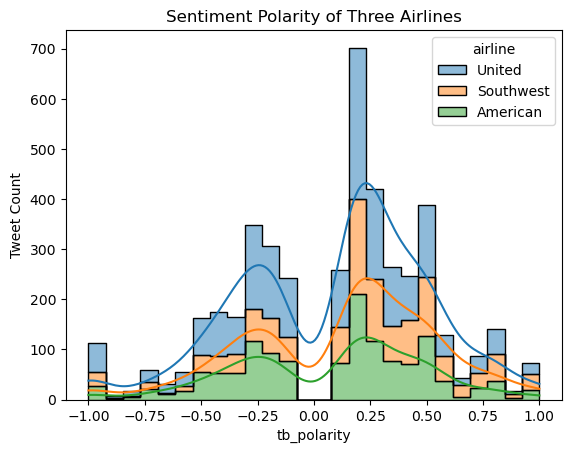

In [53]:
fig, ax = plt.subplots()
#ax.legend().set_title("")

sns.histplot(data=data, x="tb_polarity", hue="airline", multiple="stack", element='step', kde=True)


plt.title("Sentiment Polarity of Three Airlines")
plt.ylabel("Tweet Count")
plt.show()

United 3822
Southwst 2420
American 2759


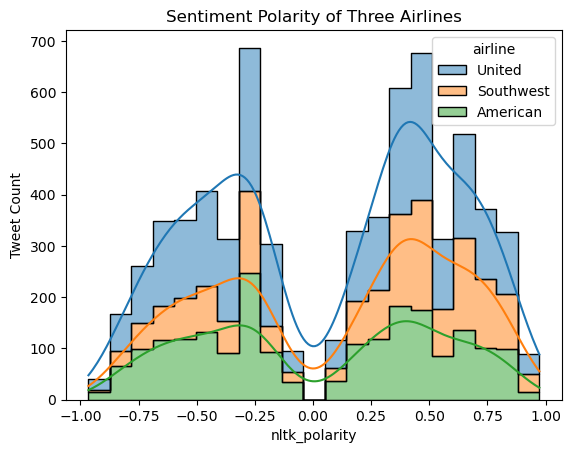

In [54]:
airlines_of_interest = ["United", "Southwest", "American"]
data = df[(df.nltk_polarity < -0.1) | (df.nltk_polarity > 0.1)]
data = data.loc[df.airline.isin(airlines_of_interest)]

print("United", df.airline[df.airline == 'United'].count())
print("Southwst", df.airline[df.airline == 'Southwest'].count())
print("American", df.airline[df.airline == 'American'].count())

fig, ax = plt.subplots()
#ax.legend().set_title("")

sns.histplot(data=data, x="nltk_polarity", hue="airline", multiple="stack", element='step', kde=True)


plt.title("Sentiment Polarity of Three Airlines")
plt.ylabel("Tweet Count")
plt.show()

### Sentiment Polarity Distribution by Airline

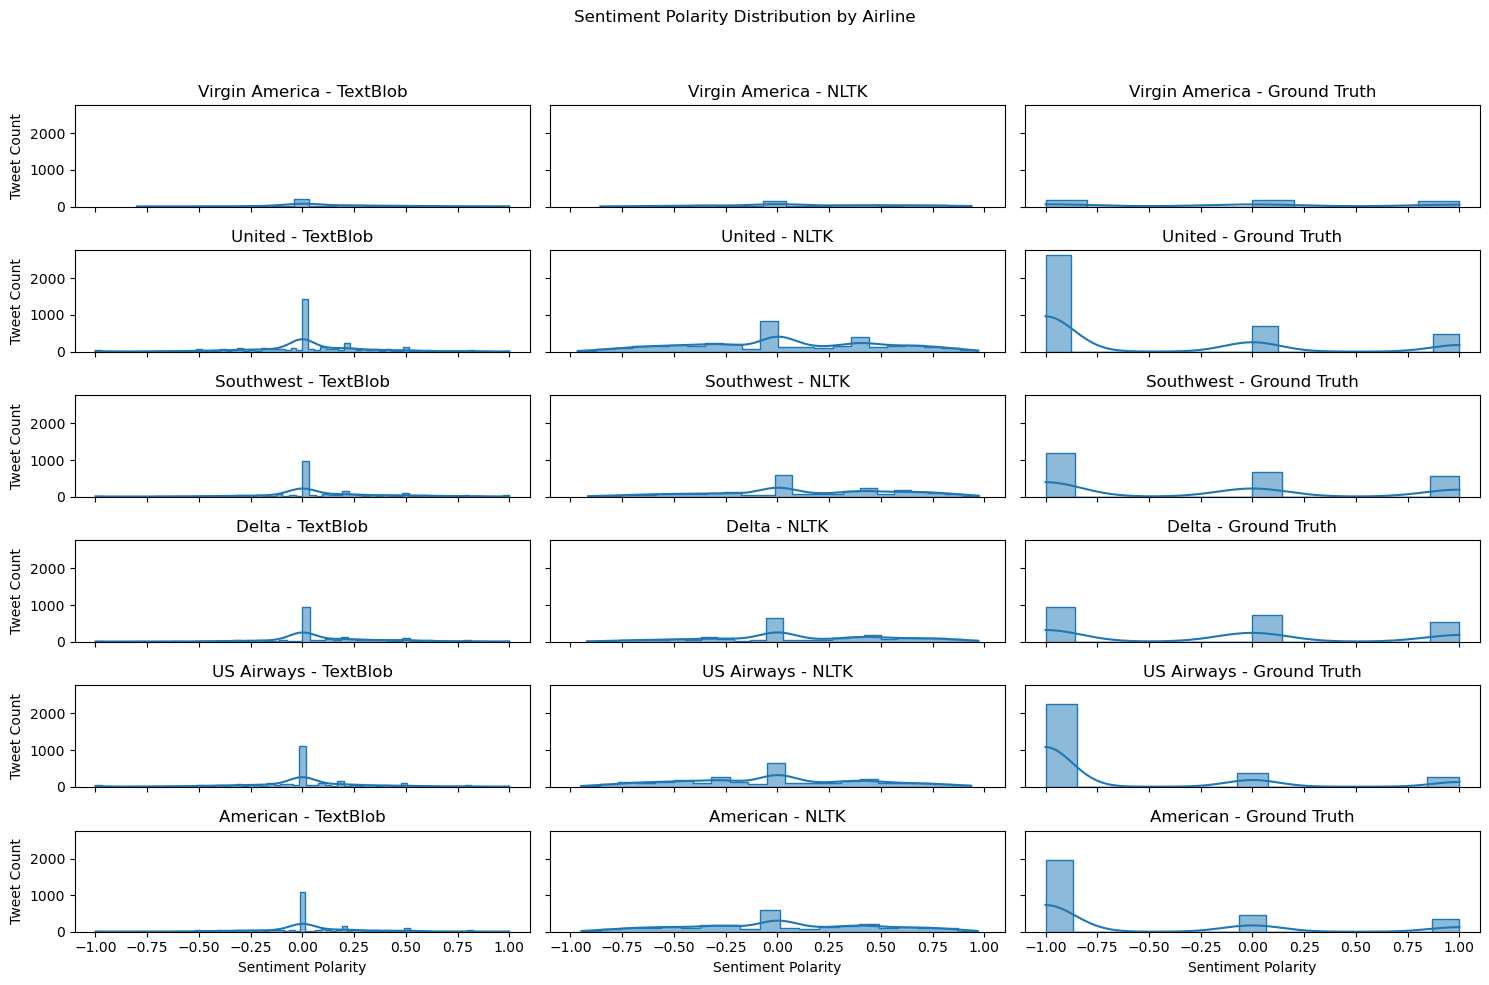

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of airlines
airlines = df['airline'].unique()

# Define the sentiment tools
sentiment_tools = ['TextBlob', 'NLTK', 'Ground Truth']

# Create subplots for each airline
fig, axes = plt.subplots(nrows=len(airlines), ncols=len(sentiment_tools), figsize=(15, 10), sharex=True, sharey=True)

# Set the title for the overall plot
fig.suptitle("Sentiment Polarity Distribution by Airline")

# Iterate through airlines
for i, airline in enumerate(airlines):
    airline_data = df[df['airline'] == airline]
    
    # Iterate through sentiment tools
    for j, tool in enumerate(sentiment_tools):
        ax = axes[i, j]
        
        # Select the appropriate polarity data based on the sentiment tool
        if tool == 'TextBlob':
            polarity_data = airline_data['tb_polarity']
        elif tool == 'NLTK':
            polarity_data = airline_data['nltk_polarity']
        else:
            polarity_data = airline_data['ground_truth_sentiment']
        
        # Plot the histogram with KDE
        sns.histplot(data=airline_data, x=polarity_data, ax=ax, element='step', common_norm=False, kde=True)
        ax.set_title(f"{airline} - {tool}")
        
        if i == len(airlines) - 1:
            ax.set_xlabel("Sentiment Polarity")
        
        if j == 0:
            ax.set_ylabel("Tweet Count")

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()
